In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import matplotlib

In [11]:
fontname='c:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=fontname).get_name()
rc('font',family=font_name)
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

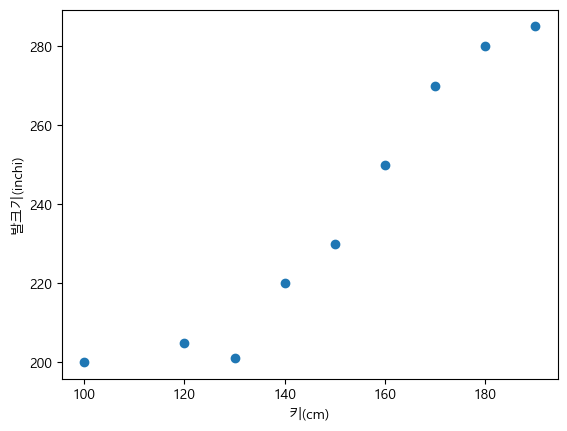

In [12]:
키=[100,120,130,140,150,160,170,180,190]
발크기 =[200,205,201,220,230,250,270,280,285]
plt.scatter(키, 발크기)
plt.xlabel('키(cm)')
plt.ylabel('발크기(inchi)')
plt.show()

0.9564028947797828


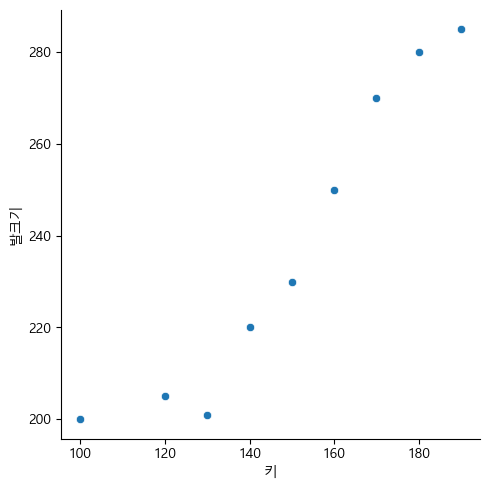

In [13]:
df=pd.DataFrame({'키':키, '발크기' : 발크기})
sns.relplot(x='키', y='발크기',data=df)
print(df.키.corr(df.발크기))
plt.show()

-0.9879199164035133


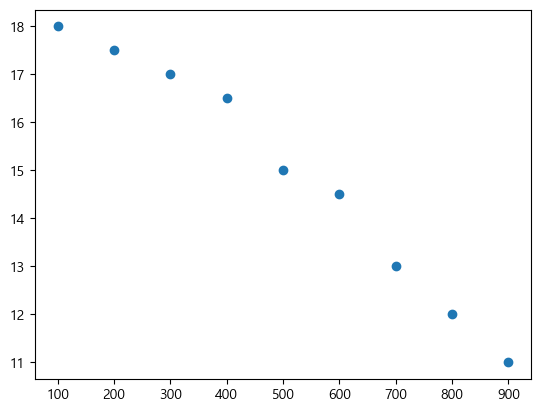

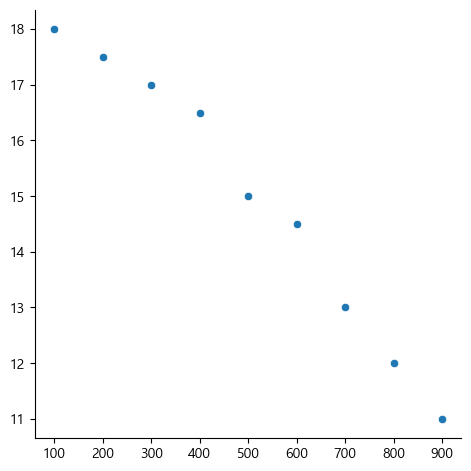

In [14]:
h=[100,200,300,400,500,600,700,800,900]
t=[18.0,17.5,17,16.5,15,14.5,13,12,11]
df=pd.DataFrame({'h':h, 't':t})
print(df.h.corr(df.t))
plt.scatter(h,t)
sns.relplot(x=h, y=t, data=df)

0.15172977938718116


<Axes: >

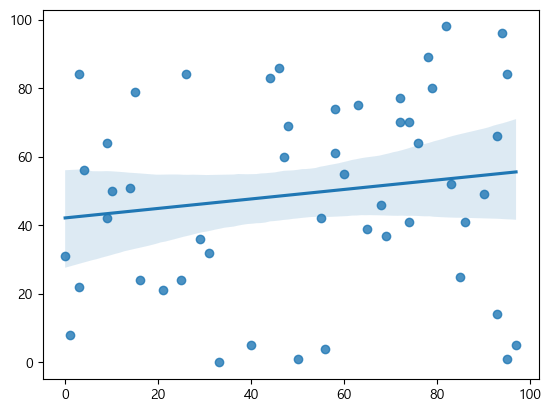

In [15]:
x=np.random.randint(0,100,50)
y=np.random.randint(0,100,50)
df=pd.DataFrame({'x':x, 'y':y})
print(df.x.corr(df.y))
sns.regplot(x=x,y=y,data=df)

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64 0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64


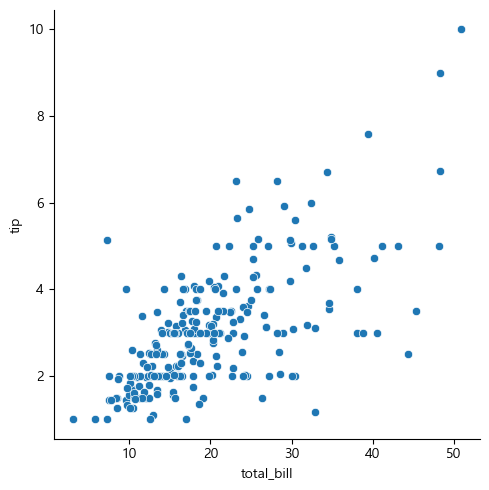

In [16]:
tips=sns.load_dataset('tips')
print(tips.total_bill, tips.tip)
sns.relplot(x='total_bill',y='tip',data=tips)

# 상관관계분석과 상관계수
- 상관관계분석: 두 변수사이의 상관정도를 분석하는 것
- 상관계수: 두 변수 상관관계 강도를 나타내는 것

- 상관계수(기호:r)
 --1<= r <= 1 의값을 가짐 

In [17]:
import math

def correlation(x,y):
    n=len(x)
    x_sum=0.0
    y_sum=0.0
    x_sum_pow=0.0
    y_sum_pow=0.0
    mul_xy_sum=0.0

    for i in range(n):
        mul_xy_sum = mul_xy_sum + float(x[i]) * float(y[i])
        x_sum = x_sum + float(x[i])
        y_sum = y_sum + float(y[i])
        x_sum_pow = x_sum_pow = pow(float(x[i]), 2)
        y_sum_pow = y_sum_pow = pow(float(y[i]), 2)

        try:
            r = ((n*mul_xy_sum)-(x_sum*y_sum)) / math.sqrt(((n*x_sum_pow)- pow(x_sum,2)) * ((n*y_sum_pow) - pow(y_sum,2)))

        except:
            r=0.0
    return r


In [19]:
print('상관관계 분석 : ' , correlation(키, 발크기))
print('산의 높이와 기온사이 상관관계 분석 : ', correlation(t, h))
print('random 발생 값 상관관계 분석:' ,correlation(x, y))

상관관계 분석 :  0.029146127506242053
산의 높이와 기온사이 상관관계 분석 :  -0.10449513806805451
random 발생 값 상관관계 분석: 0.052366474116011474


In [23]:
height=[100,120,130,140,150,160,170,180,190]
foot_size =[200,205,201,220,230,250,270,280,285]
weight = [25, 30, 38,35,40,45,55,68,70]
list=[height,foot_size,weight]
list
column_names=['height','foot_size','weight']
df=pd.DataFrame(list).T
df.columns=column_names
print(df['height'].corr(df['foot_size']))
print(df['height'].corr(df['weight']))
print(df['weight'].corr(df['foot_size']))
corr=df.corr()
print(corr)

0.9564028947797828
0.9522708360712443
0.9534203817306023
             height  foot_size    weight
height     1.000000   0.956403  0.952271
foot_size  0.956403   1.000000  0.953420
weight     0.952271   0.953420  1.000000


# 상관관계 시각화
- scatter : 두 변수 사이의 상관관계 시각화
- relplot : 두 변수 사이의 상관관계 시각화
- heatmap : 데이터프레임 필드사이의 상관관계 시각화

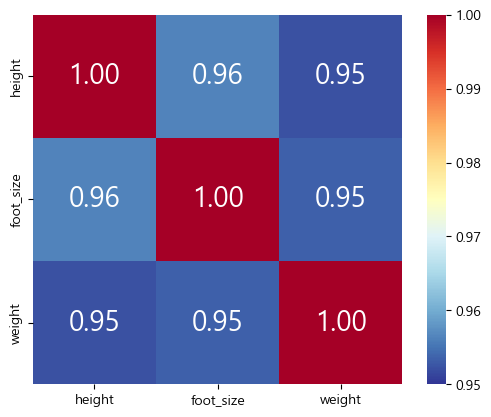

In [32]:
corr_heatmap=sns.heatmap(corr, # value
                        cbar=True, # 사이브바 표시 ,defalut True
                        annot=True,  # 값 표시
                        annot_kws={'size':20}, #annot의 글자크기
                        fmt='.2f', # 숫자형식
                        square=True, # 정사각형여부
                        cmap='RdYlBu_r', # 색상
                        vmin=0.95, # 최소값
                        vmax=1 #최대값
                        )

In [37]:
tips=sns.load_dataset('tips')
tips_corr=tips.corr()
tips_corr

C:\Users\admin\AppData\Local\Temp\ipykernel_13072\2052052474.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tips_corr=tips.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


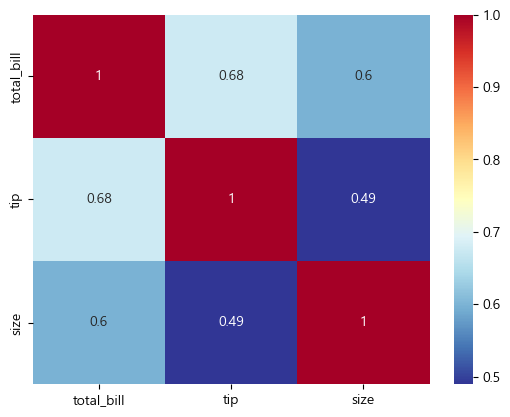

In [40]:
tips_corr_heatmap= sns.heatmap(tips_corr,
                              cbar=True,
                              annot=True,
                              cmap='RdYlBu_r')

[[ True  True  True]
 [False  True  True]
 [False False  True]]


C:\Users\admin\AppData\Local\Temp\ipykernel_13072\4187435107.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(tips_corr, dtype=np.bool)


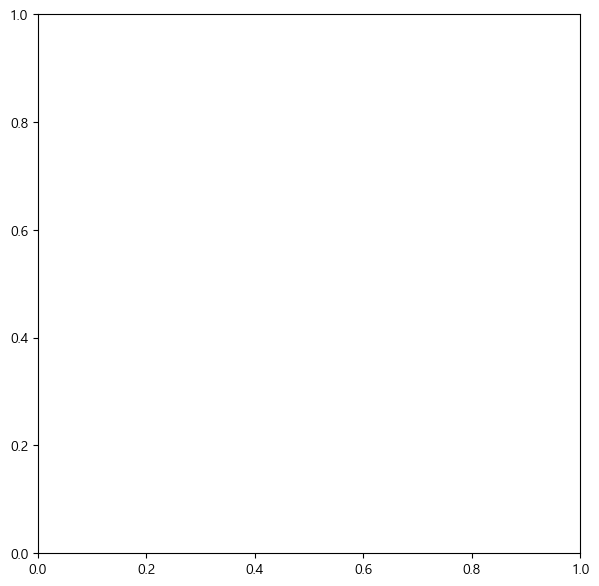

In [42]:
import numpy as np
fig_ax = plt.subplots(figsize=(7,7))
mask=np.zeros_like(tips_corr, dtype=np.bool)
#print(mask)
mask[np.triu_indices_from(mask)] = True
print(mask)

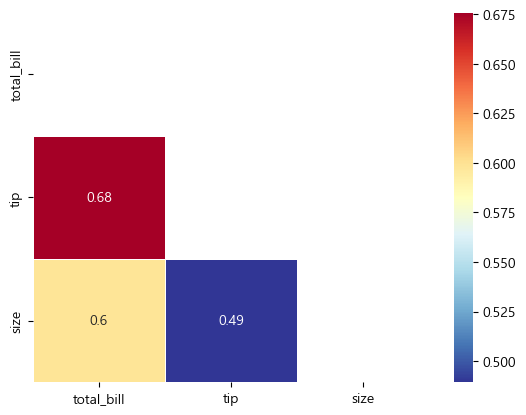

In [43]:
tips_corr_heatmap = sns.heatmap(tips_corr,
                                annot=True,
                                mask=mask,
                                linewidths=0.5,
                                cmap='RdYlBu_r')